<a href="https://colab.research.google.com/github/mornaeldernar/BeduML/blob/main/Copia_de_Reto02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto 02
**_Dr. Antonio Arista Jalife_**

En este ejemplo vamos a editar un poco los resultados que obtenemos de los árboles de decisión, y buscaremos alguna posible falla. Tomando como base el código del Ejemplo 02, vamos a construir un árbol de decisión.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import tree as treeClassifier

In [ ]:
#Para las salidas, utilizaremos la variable Y
y = ["Antonio", "Elly", "Patricia", "María", "Juana", "José", "Luis"]

#Características:
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
x = np.array([
     [0,1,0,0,0,0], #Antonio: No tiene cabello largo, usa lentes, no usa sombrero, no es mujer, no tiene bigote, no tiene ojos claros
     [1,1,1,1,0,0], #Elly: Tiene cabello largo, usa lentes, usa sombrero, es mujer, no tiene bigote, no tiene ojos claros
     [0,0,1,1,0,1], #Patricia: ...
     [1,1,0,1,0,0], #Maria: ...
     [0,0,1,1,0,0], #Juana: ...
     [1,0,0,0,1,1], #José: ...
     [0,1,1,0,0,1]  #Luis: ...
    ], dtype=np.int16)


In [ ]:
arbol = treeClassifier.DecisionTreeClassifier()
arbol = arbol.fit(x, y)

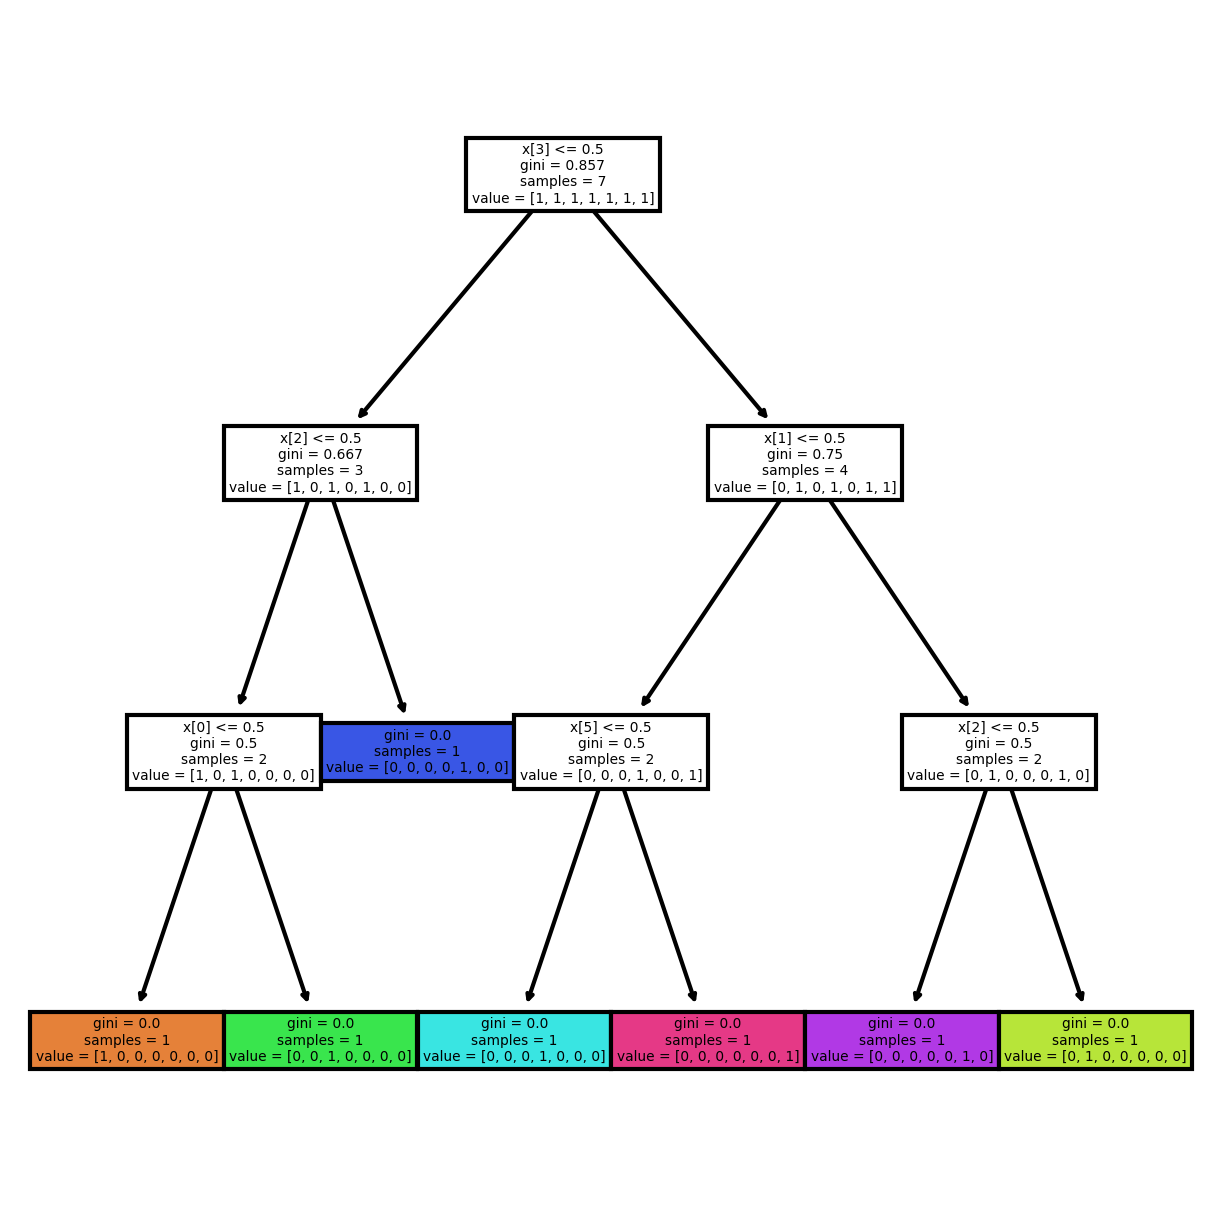

In [ ]:
plt.figure(figsize = (5,5), dpi = 300)
treeClassifier.plot_tree(arbol,filled = True);
plt.show()

Ahora, veamos que sucede si jugamos un poco con los posibles resultados y algunas variaciones:

In [ ]:
#Este sospechoso es José: Es exactamente igual a los datos del adivina quien.
caracteristicas = np.array([[1,0,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['José']


In [ ]:
#Pon a josé como sospechoso, pero con lentes aquí.
#Cabello largo | Usa lentes | Usa sombrero | Es mujer | Tiene bigote | Tiene ojos claros
caracteristicas = np.array([[1,1,0,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))
node_indicator = arbol.decision_path(caracteristicas)

Nuestro sospechoso es
['José']


In [ ]:
feature = arbol.tree_.feature
threshold = arbol.tree_.threshold
node_indicator = arbol.decision_path(caracteristicas)
leaf_id = arbol.apply(caracteristicas)
sample_id = 0
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]
for node_id in node_index:
  # continue to the next node if it is a leaf node
  if leaf_id[sample_id] == node_id:
      continue

  # check if value of the split feature for sample 0 is below threshold
  if caracteristicas[sample_id, feature[node_id]] <= threshold[node_id]:
      threshold_sign = "<="
  else:
      threshold_sign = ">"

  print(
      "decision node {node} : (caracteristicas[{sample}, {feature}] = {value}) "
      "{inequality} {threshold})".format(
          node=node_id,
          sample=sample_id,
          feature=feature[node_id],
          value=caracteristicas[sample_id, feature[node_id]],
          inequality=threshold_sign,
          threshold=threshold[node_id],
      )
  )

decision node 0 : (caracteristicas[0, 3] = 0) <= 0.5)
decision node 1 : (caracteristicas[0, 2] = 0) <= 0.5)
decision node 2 : (caracteristicas[0, 0] = 1) > 0.5)


In [ ]:
#Pon a josé como sospechoso, pero con lentes y sombrero.
caracteristicas = np.array([[1,1,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['Luis']


In [ ]:
#Pon a josé como sospechoso, pero con sombrero.
caracteristicas = np.array([[1,0,1,0,1,1]], dtype=np.int16)
print("Nuestro sospechoso es")
print(arbol.predict(caracteristicas))

Nuestro sospechoso es
['Luis']


¿Que sucedió aqui?

In [ ]:
import pandas as pd
from sklearn.tree import plot_tree

In [ ]:
def plot_decision_tree(model, feature_names, class_names):
    # plot_tree function contains a list of all nodes and leaves of the Decision tree
    tree = plot_tree(model, feature_names = feature_names, class_names = class_names,
                     rounded = True, proportion = True, precision = 2, filled = True, fontsize=10)

    # I return the tree for the next part
    return tree

In [ ]:
def plot_decision_path_tree(model, X, class_names=None):
    fig = plt.figure(figsize=(10, 10))
    class_names = model.classes_.astype(str) if type(class_names) == type(None) else class_names
    feature_names = X.index if type(X) == type(pd.Series()) else X.columns

    # Getting the tree from the function programmed above
    tree = plot_decision_tree(model, feature_names, class_names)

    # Get the decision path of the wanted prediction
    decision_path = model.decision_path([X])

    # Now remember the tree object contains all nodes and leaves so the logic here
    # is to loop into the tree and change visible attribute for components that
    # are not in the decision path
    for i in range(0,len(tree)):
        if i not in decision_path.indices:
            plt.setp(tree[i],visible=False)

    plt.show()

<ipython-input-39-5a404d884f4e>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_names = X.index if type(X) == type(pd.Series()) else X.columns


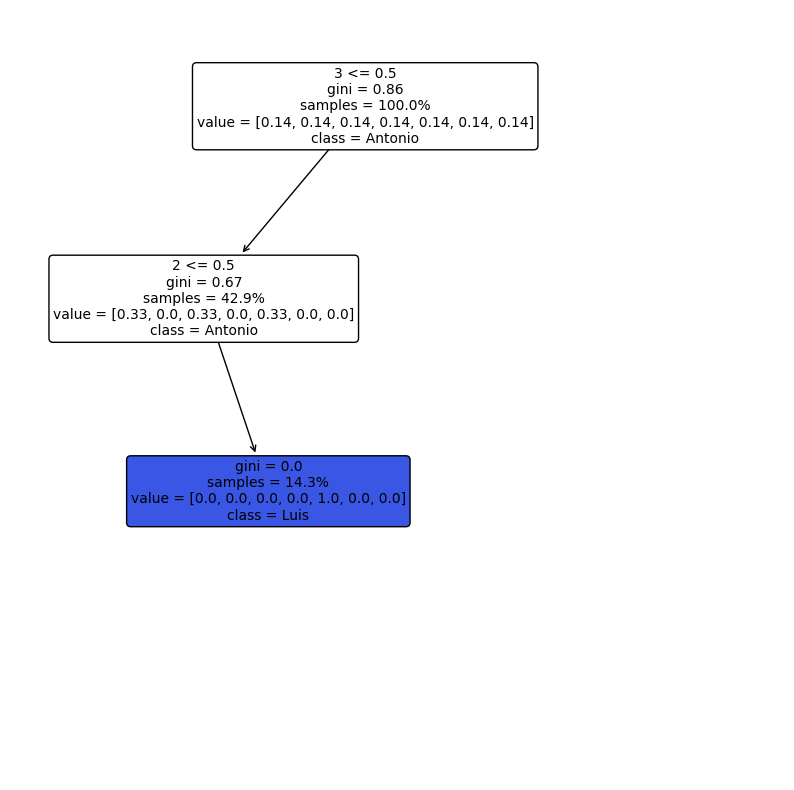

In [ ]:
plot_decision_path_tree(arbol,pd.Series([1,0,1,0,1,1]))

<ipython-input-39-5a404d884f4e>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_names = X.index if type(X) == type(pd.Series()) else X.columns


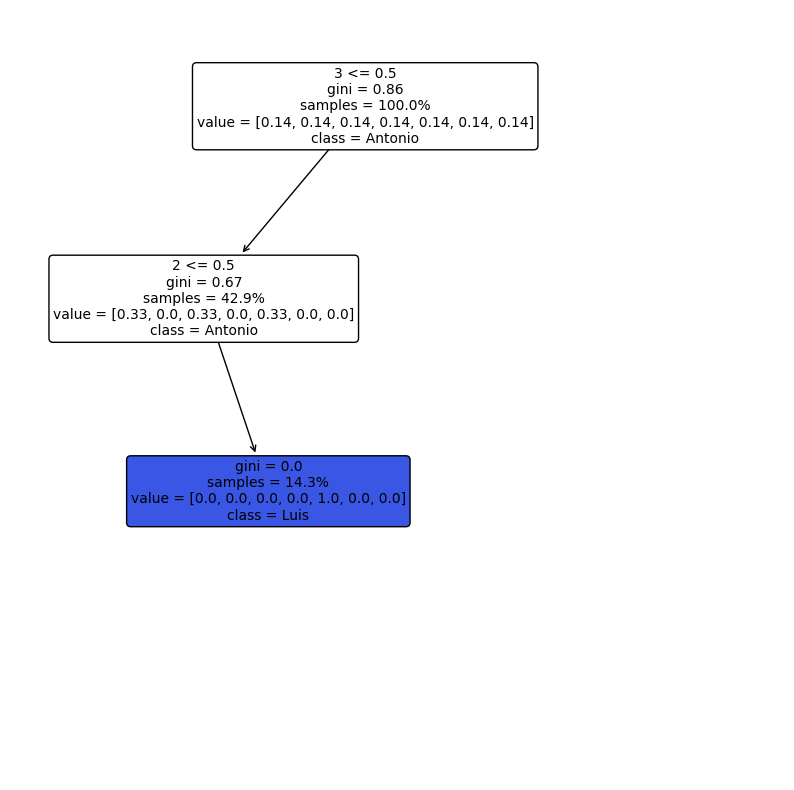

In [ ]:
plot_decision_path_tree(arbol,pd.Series([1,1,1,0,1,1]))

<ipython-input-39-5a404d884f4e>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  feature_names = X.index if type(X) == type(pd.Series()) else X.columns


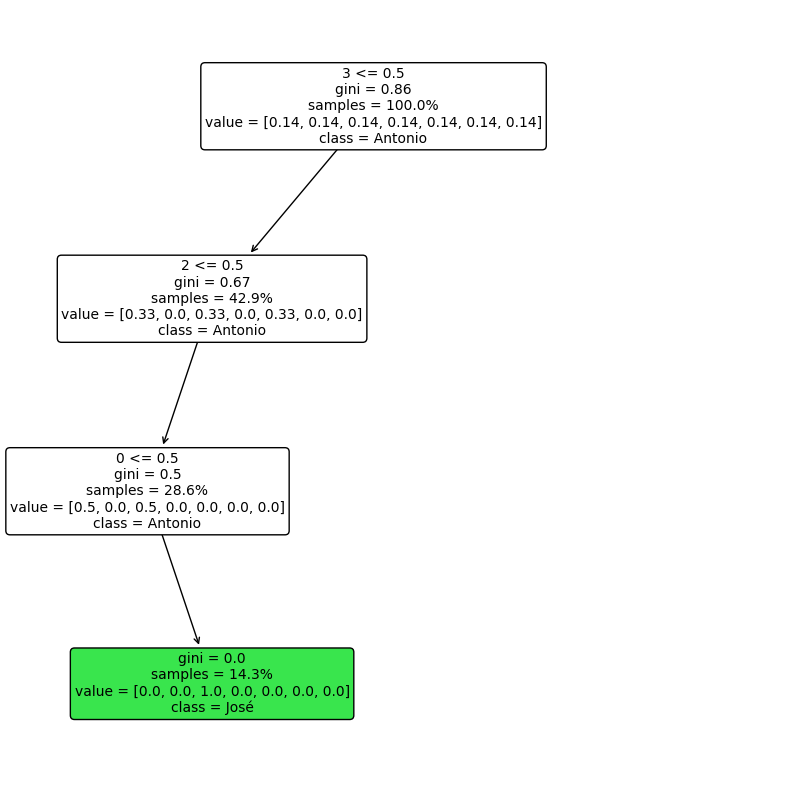

In [ ]:
plot_decision_path_tree(arbol,pd.Series([1,1,0,0,1,1]))